In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load data
train_data = pd.read_csv('trainingsdata.csv', encoding='ISO-8859-1', header=None)
test_data = pd.read_csv('testdata.csv', encoding='ISO-8859-1', header=None)


In [6]:
train_data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
test_data.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


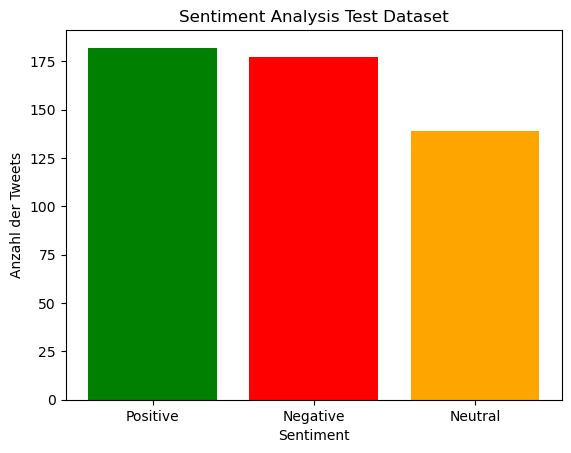

In [8]:
import matplotlib.pyplot as plt

# Zähle die Anzahl der positiven, negativen und neutralen Tweets im Testdatensatz
positive_count = len(test_data[test_data[0] == 4])
negative_count = len(test_data[test_data[0] == 0])
neutral_count = len(test_data[test_data[0] == 2])

# Erstelle ein Balkendiagramm
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
plt.bar(labels, counts, color=['green', 'red', 'orange'])
plt.title('Sentiment Analysis Test Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Anzahl der Tweets')
plt.show()


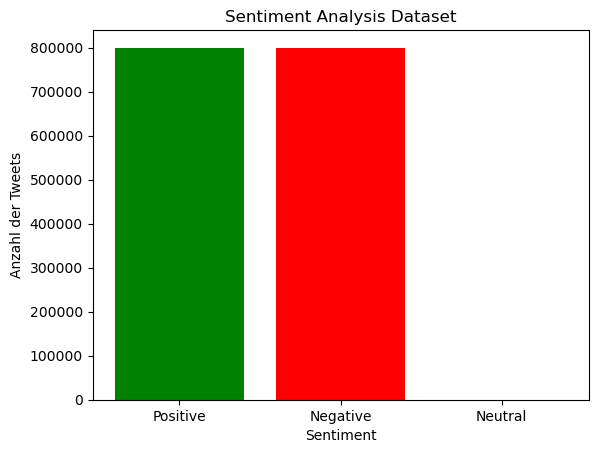

In [9]:
import matplotlib.pyplot as plt

# Zähle die Anzahl der positiven, negativen und neutralen Tweets
positive_count = len(train_data[train_data[0] == 4])
negative_count = len(train_data[train_data[0] == 0])
neutral_count = len(train_data[train_data[0] == 2])

# Erstelle ein Balkendiagramm
labels = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
plt.bar(labels, counts, color=['green', 'red', 'orange'])
plt.title('Sentiment Analysis Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Anzahl der Tweets')
plt.show()


Trainings- und Testdaten für ein Machine-Learning-Modell vorbereitet, das Textklassifikation durchführt. Dafür wird der CountVectorizer von Scikit-Learn verwendet, der aus den Texten eine Bag-of-Words-Repräsentation erstellt.

Zunächst wird ein CountVectorizer-Objekt erstellt. Danach werden die Trainingsdaten mit der fit_transform()-Methode des Vectorizers transformiert, um eine Matrix zu erstellen, in der jede Zeile einen Text darstellt und jede Spalte ein Token (d.h. ein Wort) in diesem Text. Jeder Eintrag in der Matrix gibt an, wie oft das entsprechende Token im entsprechenden Text vorkommt.

Die Labels der Trainingsdaten werden ebenfalls in einer separaten Variable gespeichert.

Anschließend werden die Testdaten mit der transform()-Methode des Vectorizers transformiert. Hierbei werden nur die Tokens berücksichtigt, die bereits im Training vorkamen. Auch die Labels der Testdaten werden in einer separaten Variable gespeichert.

astype('U') wandelt die Spalte des DataFrames in Unicode-Strings um. Die U gibt den Datentyp an, in den die Spalte umgewandelt werden soll. In diesem Fall werden die Werte der Spalte als Unicode-Strings interpretiert. Diese Konvertierung ist notwendig, um sicherzustellen, dass Textdaten korrekt von CountVectorizer() verarbeitet werden können.

In [10]:
# Prepare data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data[5].values.astype('U'))
y_train = train_data[0].values
X_test = vectorizer.transform(test_data[5].values.astype('U'))
y_test = test_data[0].values

# Train model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.5823293172690763


In [11]:
new_sentence = "Love to study"
vectorized_sentence = vectorizer.transform([new_sentence])
predicted_sentiment = clf.predict(vectorized_sentence)[0]

if predicted_sentiment == 0:
    print("Der Satz hat eine negative Stimmung.")
elif predicted_sentiment == 2:
    print("Der Satz hat eine neutrale Stimmung.")
else:
    print("Der Satz hat eine positive Stimmung.")



Der Satz hat eine positive Stimmung.


In [12]:
new_sentence = "Hate to study"
vectorized_sentence = vectorizer.transform([new_sentence])
predicted_sentiment = clf.predict(vectorized_sentence)[0]

if predicted_sentiment == 0:
    print("Der Satz hat eine negative Stimmung.")
elif predicted_sentiment == 2:
    print("Der Satz hat eine neutrale Stimmung.")
else:
    print("Der Satz hat eine positive Stimmung.")

Der Satz hat eine negative Stimmung.
